# <font color="blue"> DNP 1: Solid Effect </font>

In [1]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub/')
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt
sl.Defaults['cache']=False

In [35]:
ex=sl.ExpSys(v0H=600,Nucs=['e-','1H'],LF=[False,True],vr=5000,T_K=80,pwdavg=sl.PowderAvg(q=4))
ex.set_inter('hyperfine',i0=0,i1=1,Axx=-1000000,Ayy=-1000000,Azz=2000000)
# ex.set_inter('dipole',i0=0,i1=1,delta=2000000)
ex.set_inter('g',i=0,gxx=2.0027,gyy=2.0031,gzz=2.0034,euler=[0,0,0])

In [36]:
L=ex.Liouvillian()

In [37]:
L.clear_relax()
L.add_relax(Type='T2',i=0,T2=.890e-6)
L.add_relax(Type='T2',i=1,T2=5e-3)
L.add_relax(Type='T1',i=0,T1=1.4e-3)
L.add_relax(Type='T1',i=1,T1=10)
_=L.add_relax(Type='recovery')

In [38]:
seq=L.Sequence()
seq.add_channel(channel='e-',t=[0,1e-3],v1=1e6,voff=589e6)

In [54]:
rho=sl.Rho(rho0='ez',detect=['1Hz'])

In [55]:
rho.clear()
rho.DetProp(seq,n=20000)

Density Matrix/Detection Operator
rho0: ez
detect[0]: 1Hz
Current time is 20000000.000 microseconds
20000 time points have been recorded


<IPython.core.display.Javascript object>


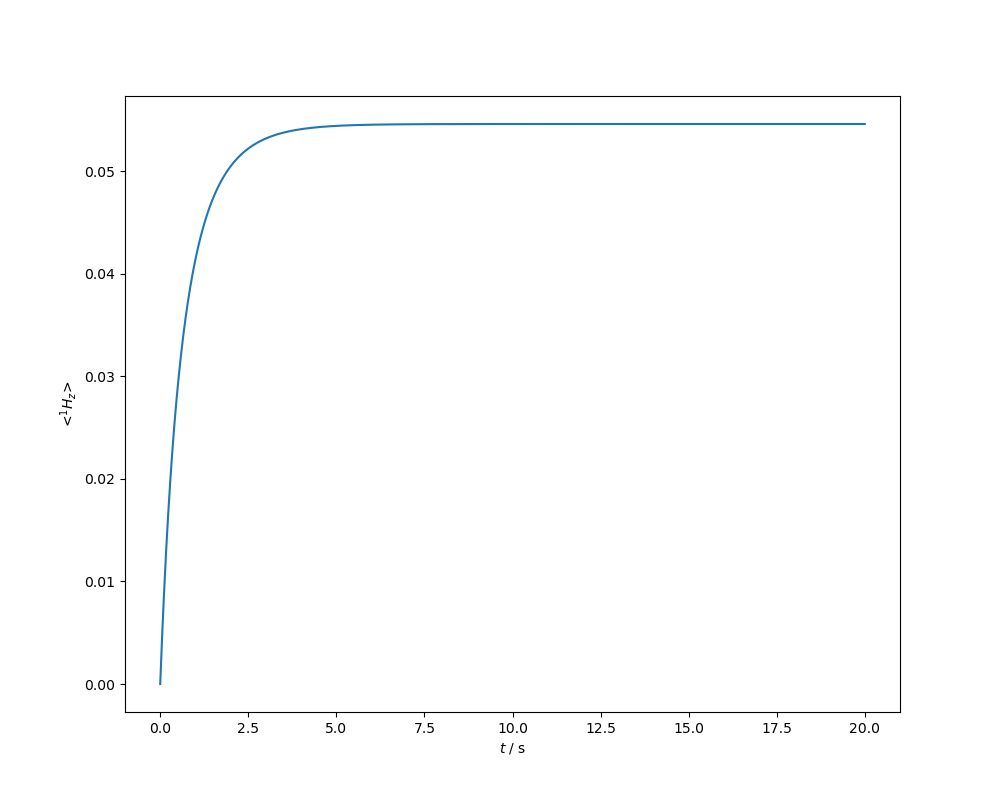

In [56]:
ax=rho.plot(axis='s')
ax.figure.set_size_inches([10,8])

In [59]:
seq=L.Sequence()
seq.add_channel(channel='e-',t=[0,1e-3],v1=0,voff=589e6)
U=seq.U()
rho1=sl.Rho(rho0='zero',detect=['1Hz'])

<IPython.core.display.Javascript object>


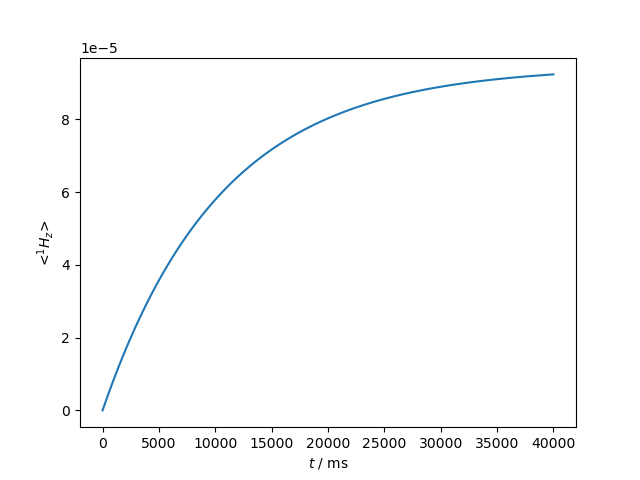

<AxesSubplot:xlabel='$t$ / ms', ylabel='<$^{1}H_z$>'>

In [61]:
rho1.clear()
rho1.DetProp(U,n=40000)
rho1.plot()

## Generate a field profile

In [27]:
rho=sl.Rho(rho0='Thermal',detect='1Hz')

offset=np.linspace(550e6,650e6,51)

I=[]
for k,offset0 in enumerate(offset):
    rho.clear()
    seq=L.Sequence()
    seq.add_channel(channel='e-',v1=1e6,voff=offset0)
    U=seq.U()**(5*1000*10)
    (U*rho)()
    I.append(rho.I[0,0])
    if np.mod(k,10)==0:print(k)

/Users/albertsmith/Documents/GitHub/SLEEPY/Propagator.py:221: UserWarning: Power of a propagator should only be used if the propagator length is an integer multiple of rotor periods
  warnings.warn('Power of a propagator should only be used if the propagator length is an integer multiple of rotor periods')


0
10
20
30
40
50


<IPython.core.display.Javascript object>


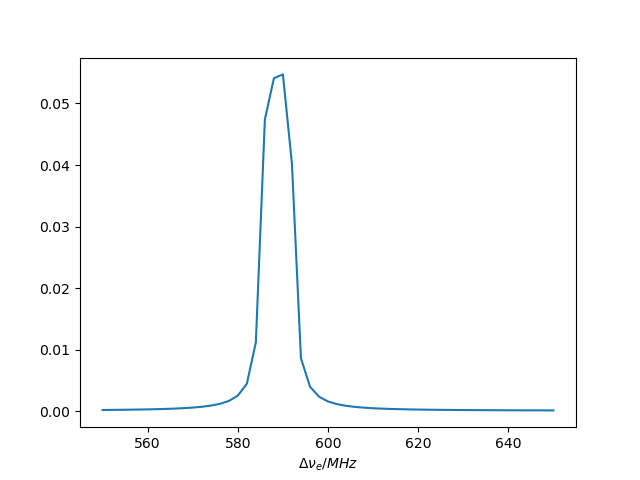

Text(0.5, 0, '$\\Delta\\nu_e / MHz$')

In [30]:
ax=plt.subplots()[1]
ax.plot(offset/1e6,np.array(I).real)
ax.set_xlabel(r'$\Delta\nu_e / MHz$')

In [29]:
%matplotlib notebook